Ex. 1

- Read the file `wnv_human_cases.csv` as a `pandas` DataFrame
- Add up the positive cases for each year
- Find the week in the year when there are the highest average cases of West Nile virus reported
- Which county reported the highest number of cases in that week and what year did it happen?
- Plot the orignal data and a rolling average with window length of 3 and minimum period of 1 on the same plot

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wnv_human_cases.csv')
df.head()

,Year,Week Reported,County,Positive Cases
0,2006,35,Alameda,1
1,2006,33,Butte,4
2,2006,34,Butte,1
3,2006,35,Butte,10
4,2006,36,Butte,2


In [3]:
df['Positive Cases'].sum()

5229

In [4]:
df.loc[df['Positive Cases'] == df['Positive Cases'].max(), ['Week Reported']]

,Week Reported
1642,41


In [5]:
(
    df[df[ 'Week Reported'] == 41].
    sort_values( 'Positive Cases', ascending=False).
    head(1)
)

,Year,Week Reported,County,Positive Cases
1642,2017,41,Los Angeles,40


Part 5 is ambiguous. Here I show the rollilng average summed over all counties for a period in time.

In [6]:
df_1 = (
    df.groupby(['Year', 'Week Reported']).sum().
    sort_values(['Year', 'Week Reported']).
    pipe(lambda df_: df_.assign(rolling= df_.rolling(window=3, min_periods=1).mean())).
    assign(time=f"{df['Year']}-{df['Week Reported']}")
)

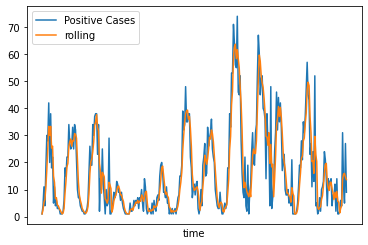

In [7]:
df_1.plot.line(x='time', y=['Positive Cases', 'rolling'], xticks=[])
pass

Ex. 2 

- Create a `pandas` DataFrame from the data in `yuck.csv`
- When done, your DataFame should look like the one in `less_yuck.csv`

In [8]:
! cat yuck.csv

% This is my CSV file
% I like comments
first,last,age
% first is first naem, last is last name, age is as of 1 Jan 2019
"Driehe","Dietriech, von",23
"Ahmad","Ibrahim, bin",34

% I like to mix separators
Charles,Blow,57
Andrew:Carnegie:87

% This is the last entry
Amy,Good,12


In [9]:
df = pd.read_csv('yuck.csv', comment='%', quotechar='"')
df.iloc[3, :] = df.loc[3,'first'].split(':')
df

,first,last,age
0,Driehe,"Dietriech, von",23
1,Ahmad,"Ibrahim, bin",34
2,Charles,Blow,57
3,Andrew,Carnegie,87
4,Amy,Good,12


In [10]:
pd.read_csv('less_yuck.csv')

,first,last,age
0,Driehe,"Dietriech, von",23
1,Ahmad,"Ibrahim, bin",34
2,Charles,Blow,57
3,Andrew,Carnegie,87
4,Amy,Good,12


Ex. 3

- Create a `pnadas` DataFrame called `df` from the data set at https://bit.ly/2ksKr8f, taking care to only read in the `time` and `value` columns. (5 points)
- Fill all rows with missing values with the value from the last non-missing value (i.e. forward fill) (5 points)
- Convert to a `pandas` Series `s` using `time` as the index (5 points)
- Create a new series `s1` with the rolling average using a shifting window of size 7 and a minimum period of 1 (5 points)
- Report the `time` and value for the largest rolling average (5 points)

In [11]:
df = pd.read_csv('https://bit.ly/2ksKr8f', usecols=[1,2])
df.head()

,time,value
0,1,306.25
1,2,299.50
2,3,303.45
3,4,296.75
4,5,304.40


In [12]:
df = df.fillna(method='ffill')

In [13]:
s = df.set_index('time')['value']

In [14]:
s1 = s.rolling(window=7, min_periods=1).mean()

In [15]:
s1[s1== s1.max()]

time
772    505.15
Name: value, dtype: float64

Ex. 4

Given the DataFrame `df`, recreate the correlation plot shown using `seaborn`. Note the color mapping is `viridis`.

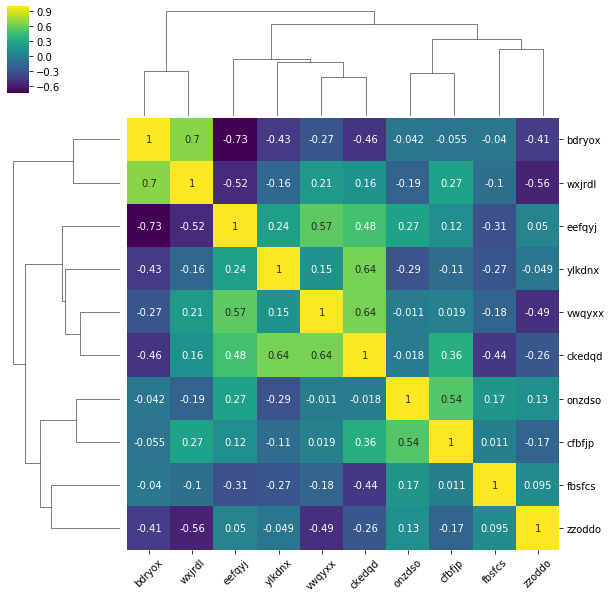

In [16]:
import numpy as np
import string

np.random.seed(123)
nrows = 10
ncols = 10
k = 6
xs = np.random.normal(0, 1, (nrows, ncols))
names = [''.join(np.random.choice(list(string.ascii_lowercase), k)) for i in range(10)]
df = pd.DataFrame(xs, columns=names)
df

from IPython.display import Image
Image('corrplot.png')

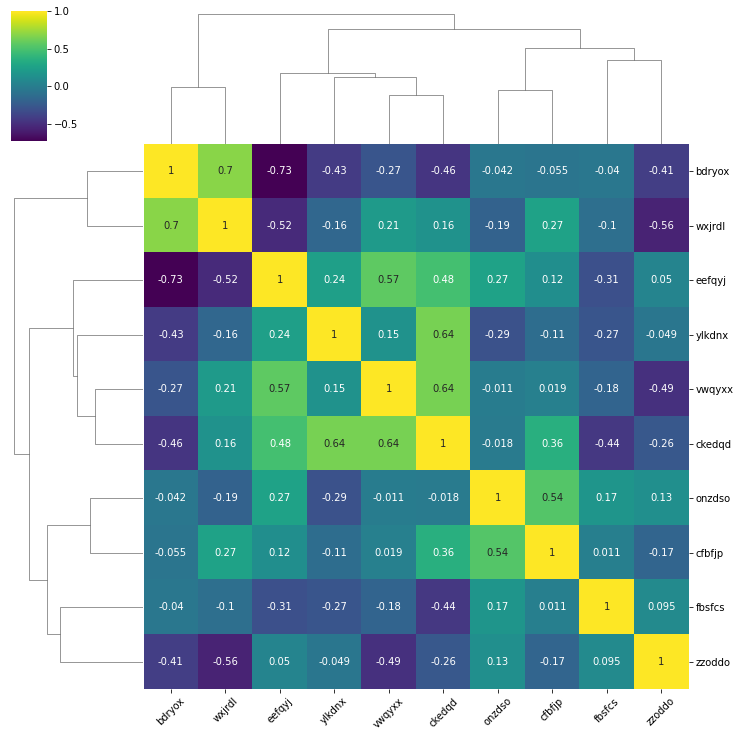

In [17]:
g = sns.clustermap(df.corr(), annot=True, cmap='viridis')
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation = 45)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation = 0)
pass